In [1]:
import sys
sys.path.append(sys.path[0][:sys.path[0].find('DVML-P7') + len('DVML-P7')])
from Code.UtilityFunctions.get_data_path import get_path
import pandas as pd

from Code.UtilityFunctions.run_query import run_query

In [2]:
yelp_wiki_category_mappings = pd.read_csv(get_path('yelp_wiki_schema_triples_df.csv'))

In [8]:
yelp_wiki_category_mappings

,category,occurences,split_category,SchemaType,schema_or_yelp_category,qid,qid_label,subclassOf,subclassOf_label
0,Restaurants,52268,Restaurant,Restaurant,Restaurant,Q11707,restaurant,Q41176,building
1,Restaurants,52268,Restaurant,Restaurant,Restaurant,Q11707,restaurant,Q41958,foodservice
2,Restaurants,52268,Restaurant,Restaurant,Restaurant,Q11707,restaurant,Q1431026,horeca
3,Restaurants,52268,Restaurant,Restaurant,Restaurant,Q11707,restaurant,Q62602544,eating and lodging
4,Food,27781,Food,NaN,Food,Q2095,food,Q223557,physical object
...,...,...,...,...,...,...,...,...,...
2063,Housing Cooperatives,1,HousingCooperative,NaN,HousingCooperative,Q562166,housing cooperative,Q4539,cooperative
2064,Housing Cooperatives,1,HousingCooperative,NaN,HousingCooperative,Q562166,housing cooperative,Q699405,residence
2065,Housing Cooperatives,1,HousingCooperative,NaN,HousingCooperative,Q562166,housing cooperative,Q4830453,business
2066,Trade Fairs,1,TradeFair,NaN,TradeFair,Q57305,trade fair,Q288514,fair


In [4]:
df = yelp_wiki_category_mappings[['split_category', 'SchemaType', 'schema_or_yelp_category', 'qid', 'qid_label']].drop_duplicates()

In [10]:
df['split_category'].dropna().drop_duplicates()

0               Restaurant
4                     Food
6                 Shopping
7              HomeService
8                   Beauty
               ...        
2059              BeachBar
2061             DuiSchool
2062             PatentLaw
2063    HousingCooperative
2066             TradeFair
Name: split_category, Length: 1416, dtype: object

In [12]:
df[['split_category', 'SchemaType']].dropna().drop_duplicates()

,split_category,SchemaType
0,Restaurant,Restaurant
6,Shopping,Retail
7,HomeService,Service
8,Beauty,DaySpa
9,Spa,DaySpa
...,...,...
2050,Osteopath,Osteopathic
2052,TownHall,CityHall
2055,Kiosk,ReturnAtKiosk
2056,BikeParking,ParkingFacility


In [6]:
df[~df['SchemaType'].isna()]

,split_category,SchemaType,schema_or_yelp_category,qid,qid_label
0,Restaurant,Restaurant,Restaurant,Q11707,restaurant
6,Shopping,Retail,Retail,Q126793,retail
7,HomeService,Service,Service,Q44127,server
8,Beauty,DaySpa,DaySpa,NaN,NaN
9,Spa,DaySpa,DaySpa,NaN,NaN
...,...,...,...,...,...
2050,Osteopath,Osteopathic,Osteopathic,NaN,NaN
2052,TownHall,CityHall,CityHall,Q3640798,municipal prefecture
2055,Kiosk,ReturnAtKiosk,ReturnAtKiosk,NaN,NaN
2056,BikeParking,ParkingFacility,ParkingFacility,Q6501349,parking lot


In [33]:
df[['SchemaType', 'qid']].dropna().head(50)

,split_category,SchemaType,qid
0,Restaurant,Restaurant,Q11707
6,Shopping,Retail,Q126793
7,HomeService,Service,Q44127
10,Nightlife,NightClub,Q622425
14,Health,Physician,Q39631
...,...,...,...
2006,Hospitalist,Clinician,Q5133860
2024,AviationService,Airline,Q46970
2052,TownHall,CityHall,Q3640798
2056,BikeParking,ParkingFacility,Q6501349


In [70]:
df.loc[~df['SchemaType'].isna(), 'qid_label'].shape

(431,)

In [71]:
df['schema_or_yelp_category'].unique().shape

(1239,)

In [72]:
yelp_wiki_category_mappings['schema_or_yelp_category'].unique().shape

(1239,)

In [73]:
yelp_wiki_category_mappings.groupby('qid_label').count().sort_values('qid', ascending=False)

,category,occurences,split_category,SchemaType,schema_or_yelp_category,qid,subclassOf,subclassOf_label
qid_label,,,,,,,,
ski resort,25,25,25,25,25,25,25,25
motorcycle,25,25,25,25,25,25,25,25
park,25,25,25,25,25,25,25,25
car dealership,21,21,21,21,21,21,21,21
dentist,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...
hypnotherapy,1,1,1,0,1,1,1,1
hydrotherapy,1,1,1,0,1,1,1,1
hot air balloon,1,1,1,0,1,1,1,1


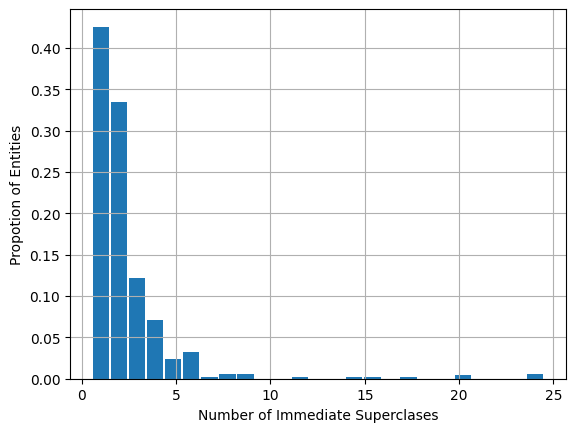

In [97]:
data = yelp_wiki_category_mappings.groupby('qid').count().sort_values('qid', ascending=False)['subclassOf'].hist(bins=25, alpha=1, align='left', rwidth=0.9, density=True)
data.set_xlabel("Number of Immediate Superclases")
data.set_ylabel("Propotion of Entities")
data.grid(True)

Text(0, 0.5, 'Number of Entities')

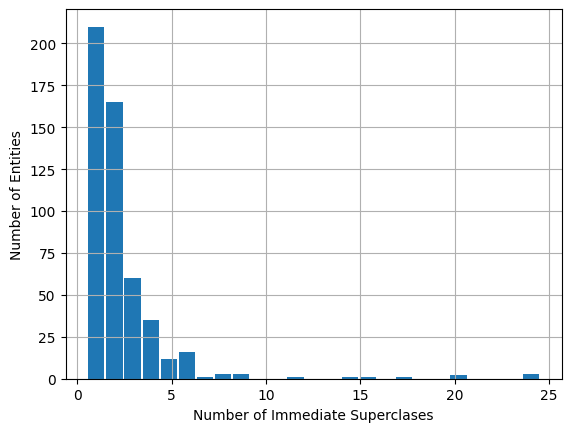

In [75]:
import matplotlib.pyplot as plt
data = yelp_wiki_category_mappings.groupby('qid').count().sort_values('qid', ascending=False)['subclassOf'].hist( bins=25, alpha=1, align='left', rwidth=0.9)
data.set_xlabel("Number of Immediate Superclases")
data.set_ylabel("Number of Entities")

In [76]:
df['qid'].dropna().shape[0], df['qid'].dropna().drop_duplicates().shape[0]

(635, 514)

In [77]:
df1 = pd.read_csv(get_path('category_occurences.csv'))

In [78]:
len(df1['split_category'].unique())

1416

## How many get sameAs relation? And how many of these are from Yelp and Schema.org respectively?

In [6]:
query = """
SELECT ?s ?qid ?qid_label
WHERE {
    ?s schema:sameAs ?qid .
}
"""
run_query(query, as_dataframe=True)

,s.value,qid.value
0,https://purl.archive.org/purl/yelp/business_ca...,https://www.wikidata.org/entity/Q706848
1,https://purl.archive.org/purl/yelp/business_ca...,https://www.wikidata.org/entity/Q80994
2,https://purl.archive.org/purl/yelp/business_ca...,https://www.wikidata.org/entity/Q1319035
3,https://purl.archive.org/purl/yelp/business_ca...,https://www.wikidata.org/entity/Q37038
4,https://purl.archive.org/purl/yelp/business_ca...,https://www.wikidata.org/entity/Q2837942
...,...,...
529,https://schema.org/CreditCard,https://www.wikidata.org/entity/Q161380
530,https://schema.org/FilmAction,https://www.wikidata.org/entity/Q188473
531,https://schema.org/MotorizedBicycle,https://www.wikidata.org/entity/Q1377570
532,https://schema.org/Mountain,https://www.wikidata.org/entity/Q8502


In [7]:
query = """
SELECT ?s ?qid ?qid_label
WHERE {
    ?s rdfs:Class yelpont:SchemaCategory .
    ?s schema:sameAs ?qid .
}
"""
run_query(query, as_dataframe=True)

,s.value,qid.value
0,https://schema.org/Airline,https://www.wikidata.org/entity/Q46970
1,https://schema.org/Airport,https://www.wikidata.org/entity/Q1248784
2,https://schema.org/AmusementPark,https://www.wikidata.org/entity/Q194195
3,https://schema.org/Anesthesia,https://www.wikidata.org/entity/Q131130
4,https://schema.org/AnimalShelter,https://www.wikidata.org/entity/Q1411287
...,...,...
134,https://schema.org/LiquorStore,https://www.wikidata.org/entity/Q2632011
135,https://schema.org/InfectiousDisease,https://www.wikidata.org/entity/Q119660
136,https://schema.org/FireStation,https://www.wikidata.org/entity/Q1195942
137,https://schema.org/CityHall,https://www.wikidata.org/entity/Q3640798


In [19]:
query = """
SELECT ?s ?qid ?qid_label
WHERE {

    ?s rdfs:Class yelpont:YelpCategory .
    ?s schema:sameAs ?qid .
}
"""
run_query(query, as_dataframe=True)

,s.value,qid.value
0,https://purl.archive.org/purl/yelp/business_categories#accessory,https://www.wikidata.org/entity/Q706848
1,https://purl.archive.org/purl/yelp/business_categories#adult,https://www.wikidata.org/entity/Q80994
2,https://purl.archive.org/purl/yelp/business_categories#adult_education,https://www.wikidata.org/entity/Q1319035
3,https://purl.archive.org/purl/yelp/business_categories#advertising,https://www.wikidata.org/entity/Q37038
4,https://purl.archive.org/purl/yelp/business_categories#allergist,https://www.wikidata.org/entity/Q2837942
...,...,...
320,https://purl.archive.org/purl/yelp/business_categories#cheerleading,https://www.wikidata.org/entity/Q61391
321,https://purl.archive.org/purl/yelp/business_categories#circus_school,https://www.wikidata.org/entity/Q24736020
322,https://purl.archive.org/purl/yelp/business_categories#halfway_house,https://www.wikidata.org/entity/Q3565622
323,https://purl.archive.org/purl/yelp/business_categories#conveyor_belt_sushi,https://www.wikidata.org/entity/Q1230557


In [38]:
query = """
SELECT ?s ?qid ?qid_label
WHERE {
    MINUS{
    ?s rdfs:Class yelpont:SchemaCategory .}
    ?s schema:sameAs ?qid .
}
"""
run_query(query, as_dataframe=True)

,s.value,qid.value
0,https://purl.archive.org/purl/yelp/business_categories#advertising,https://www.wikidata.org/entity/Q37038
1,https://purl.archive.org/purl/yelp/business_categories#pet_insurance,https://www.wikidata.org/entity/Q10259814
2,https://purl.archive.org/purl/yelp/business_categories#makerspace,https://www.wikidata.org/entity/Q1032372
3,https://purl.archive.org/purl/yelp/business_categories#data_recovery,https://www.wikidata.org/entity/Q1054772
4,https://purl.archive.org/purl/yelp/business_categories#wig,https://www.wikidata.org/entity/Q105507
...,...,...
390,https://purl.archive.org/purl/yelp/business_categories#makeup_artist,https://www.wikidata.org/entity/Q935666
391,https://purl.archive.org/purl/yelp/business_categories#safety_equipment,https://www.wikidata.org/entity/Q938683
392,https://purl.archive.org/purl/yelp/business_categories#prop,https://www.wikidata.org/entity/Q942297
393,https://purl.archive.org/purl/yelp/business_categories#fertility,https://www.wikidata.org/entity/Q964401


In [36]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 30)

In [30]:
y[~y['qid.value'].isin(x['qid.value'])].dropna()

,s.value,qid.value
12,https://purl.archive.org/purl/yelp/business_categories#blind,https://www.wikidata.org/entity/Q10874
13,https://purl.archive.org/purl/yelp/business_categories#blue,https://www.wikidata.org/entity/Q1088
16,https://purl.archive.org/purl/yelp/business_categories#veggie,https://www.wikidata.org/entity/Q11004
20,https://purl.archive.org/purl/yelp/business_categories#hypnotherapy,https://www.wikidata.org/entity/Q1121481
37,https://purl.archive.org/purl/yelp/business_categories#gardening,https://www.wikidata.org/entity/Q124946
...,...,...
362,https://purl.archive.org/purl/yelp/business_categories#jazz,https://www.wikidata.org/entity/Q8341
363,https://purl.archive.org/purl/yelp/business_categories#gemstone,https://www.wikidata.org/entity/Q83437
369,https://purl.archive.org/purl/yelp/business_categories#coffee,https://www.wikidata.org/entity/Q8486
370,https://schema.org/Mountain,https://www.wikidata.org/entity/Q8502
